In [2]:
#Basic and most important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [ ]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the data and setting the column name as row name
X_train = pd.read_csv("/content/drive/MyDrive/Arabic Handwritten digit dataset/csvTrainImages 60k x 784.csv",header = None)
X_test = pd.read_csv("/content/drive/MyDrive/Arabic Handwritten digit dataset/csvTestImages 10k x 784.csv",header = None)
Y_train = pd.read_csv("/content/drive/MyDrive/Arabic Handwritten digit dataset/csvTrainLabel 60k x 1.csv",header = None)
Y_test = pd.read_csv("/content/drive/MyDrive/Arabic Handwritten digit dataset/csvTestLabel 10k x 1.csv",header = None)

In [ ]:
# Lets see first 10 rows of the data
X_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Lets see last 20 rows of the data
X_train.tail(20)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
59980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Lets see the first 10 label of the training set
Y_train.head(10)

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [ ]:
# Lets set an appropriate column name to the y_train
Y_train.columns = ['Digits']
Y_train

,Digits
0,0
1,1
2,2
3,3
4,4
...,...
59995,5
59996,6
59997,7
59998,8


In [ ]:
# Visualizing the first 5 row of the test data
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Visualizing the first 5 rows of the test labels
Y_test.columns = ['Digits'] # Setting the digits as column name
Y_test.head()

,Digits
0,0
1,1
2,2
3,3
4,4


In [ ]:
# Checking datatypes of each column of the training data
X_train.dtypes

0      int64
1      int64
2      int64
3      int64
4      int64
       ...  
779    int64
780    int64
781    int64
782    int64
783    int64
Length: 784, dtype: object

In [ ]:
# Checking for each columns name
X_train.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            774, 775, 776, 777, 778, 779, 780, 781, 782, 783],
           dtype='int64', length=784)

In [ ]:
# Checking the shape of training dataset and training label
X_train.shape,Y_train.shape

((60000, 784), (60000, 1))

In [ ]:
# Checking the shape of the test dataset
X_test.shape

(10000, 784)

In [ ]:
# Checking the shape of the test labels
Y_test.shape

(10000, 1)

In [ ]:
# Check for any missing values in training set
X_train.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Length: 784, dtype: int64

#### As we can see there is no missing values in the dataset

In [ ]:
# Check how many unique values are there in y_train and y_test
np.unique(Y_train),np.unique(Y_test)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

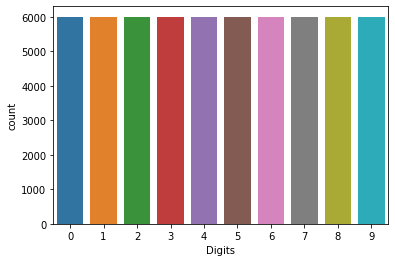

In [ ]:
# Make a plot to visualize number of examples from each category
sns.countplot(Y_train['Digits'])

#### It looks like we have equal number of examples form all the labels so data is balanced

In [ ]:
# Convert the dataframe into list format
X_train = X_train.iloc[:,:].values
X_test = X_test.iloc[:,:].values
y_train = Y_train.iloc[:,:].values
y_test = Y_test.iloc[:,:].values

In [ ]:
# Checking the number of features in a particular column
X_train[0].size

784

In [ ]:
# Reshape the data into 28x28 pixel (Hint: 28*28 = 784)
X_train = X_train.reshape(X_train.shape[0],28,28)
X_test = X_test.reshape(X_test.shape[0],28,28)
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

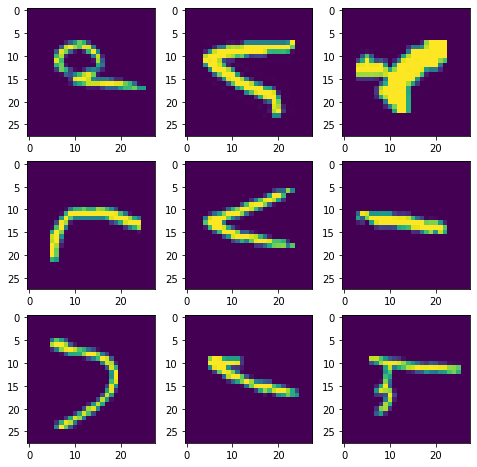

In [ ]:
# Lets visualize random images of the training dataset
plt.figure(figsize=(8,8))
for i in range(1,10):
  plt.subplot(3,3,i)
  rand_index = np.random.randint(0,10000)
  plt.imshow(X_train[rand_index])

In [ ]:
# Name each classes in easily understandable language
name_classes = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

In [ ]:
y_train,y_train.shape

(array([[0],
        [1],
        [2],
        ...,
        [7],
        [8],
        [9]]), (60000, 1))

In [ ]:
# Check the name of class of 5th example
name_classes[y_train[5,0]]

'Five'

Text(0.5, 1.0, 'Eight')

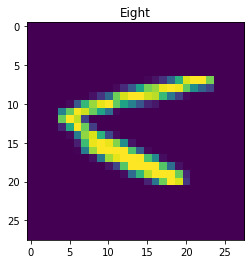

In [ ]:
# Visualize random image with name of class
rand_index = np.random.randint(0,10000)
plt.imshow(X_train[rand_index])
plt.title(name_classes[y_train[rand_index,0]])

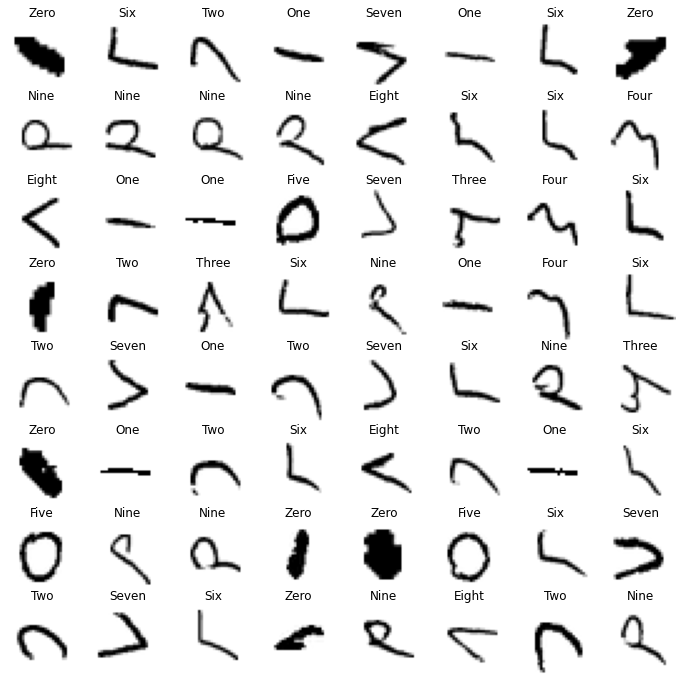

In [ ]:
# Lets visualize random 64 images
plt.figure(figsize = (12,12))
for i in range(64):
  rand_index = np.random.randint(0,10000)
  plt.subplot(8,8,i+1)
  plt.imshow(X_train[rand_index],cmap = plt.cm.binary)
  plt.title(name_classes[y_train[rand_index,0]])
  plt.axis(False)

In [ ]:
# Visualizing the shape of training label and test label
y_train.shape,y_test.shape

((60000, 1), (10000, 1))

In [ ]:
# change the shape of the labels so that neural network be compatible
total_classes = len(np.unique(y_train))
y_train = to_categorical(y_train,total_classes)
y_test = to_categorical(y_test,total_classes)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

In [ ]:
# Lets see y_train and y_test 
y_train,y_test

(array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]], dtype=float32),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]], dtype=float32))

##### Lets create our first Neural network model

In [ ]:
# Set the random seed for reproducibility
tf.random.set_seed(42) 
# Create the model
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # Flattening from 2d to 1d
    tf.keras.layers.Dense(units = 20,activation = 'relu'),
    tf.keras.layers.Dense(units = 10,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

In [ ]:
# Compile the model
model1.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
# Fit the model
history_1 = model1.fit(X_train,y_train,epochs = 30,validation_data = (X_test,y_test))

Epoch 1/30
1875/1875 [==============================] - 8s 3ms/step - loss: 1.4746 - accuracy: 0.5874 - val_loss: 0.9728 - val_accuracy: 0.7089
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6855 - accuracy: 0.7433 - val_loss: 0.6896 - val_accuracy: 0.7469
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5328 - accuracy: 0.8075 - val_loss: 0.5594 - val_accuracy: 0.8177
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4073 - accuracy: 0.8657 - val_loss: 0.4178 - val_accuracy: 0.9044
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2632 - accuracy: 0.9415 - val_loss: 0.3028 - val_accuracy: 0.9388
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1806 - accuracy: 0.9597 - val_loss: 0.2392 - val_accuracy: 0.9489
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1496 - accuracy: 0.9649 - val_loss: 0.2229 - val_accuracy:

In [ ]:
# Evaluate the model
model1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2296 - accuracy: 0.9676


[0.22958175837993622, 0.9675999879837036]

###### We can see that the model is performing 98.69% accurate on training set but on test set its performance is 96.76% only,
this is overfitting the model

In [ ]:
# checking the maximum of training data
X_train.max()

255

In [ ]:
# checking the minimum of the training data
X_train.min()

0

In [ ]:
# Lets normalize the data to be in range of 0 to 1
X_train_norm = X_train/255
X_test_norm = X_test/255

In [ ]:
X_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
X_train_norm.max(),X_train_norm.min()

(1.0, 0.0)

###### Creat another model and fit on normalized dataset

In [ ]:
# Set the random seed
tf.random.set_seed(42)
# Create the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units = 20,activation = 'relu'),
    tf.keras.layers.Dense(units = 10,activation = 'relu'),
    tf.keras.layers.Dense(units = 10,activation = 'softmax')

])

In [ ]:
# Compile the model
model2.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
# Fit the model
history_2 = model2.fit(X_train_norm,y_train,epochs = 30,validation_data = (X_test_norm,y_test))

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2774 - accuracy: 0.9249 - val_loss: 0.1555 - val_accuracy: 0.9584
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1005 - accuracy: 0.9735 - val_loss: 0.1172 - val_accuracy: 0.9680
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0801 - accuracy: 0.9788 - val_loss: 0.1162 - val_accuracy: 0.9698
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0684 - accuracy: 0.9816 - val_loss: 0.1055 - val_accuracy: 0.9722
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0606 - accuracy: 0.9830 - val_loss: 0.1017 - val_accuracy: 0.9733
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0546 - accuracy: 0.9849 - val_loss: 0.0964 - val_accuracy: 0.9753
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0491 - accuracy: 0.9864 - val_loss: 0.1034 - val_accuracy:

In [ ]:
# Evaluate the model
model2.evaluate(X_test_norm,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1450 - accuracy: 0.9750


[0.14502334594726562, 0.9750000238418579]

😞 oah! again it is overfitting, poor performance on test set.
But notice that performance on training and test set is better than the previous model, therefore normalization helped to improve our model.
Now lets try different techniques to improve the model.

In [ ]:
# Visualize the history of the both model in the below table.
print(pd.DataFrame(history_1.history))  # Dataframce of model1 history
print(pd.DataFrame(history_2.history))  # Dataframe of model2 history

        loss  accuracy  val_loss  val_accuracy
0   1.474606  0.587350  0.972783        0.7089
1   0.685534  0.743250  0.689604        0.7469
2   0.532849  0.807517  0.559448        0.8177
3   0.407256  0.865683  0.417794        0.9044
4   0.263231  0.941483  0.302797        0.9388
5   0.180609  0.959667  0.239196        0.9489
6   0.149612  0.964917  0.222934        0.9495
7   0.130235  0.969500  0.249378        0.9522
8   0.116310  0.972467  0.215250        0.9545
9   0.105701  0.974167  0.209276        0.9585
10  0.097831  0.976300  0.187957        0.9613
11  0.087643  0.977700  0.191787        0.9549
12  0.083897  0.978300  0.181534        0.9626
13  0.077207  0.980100  0.174824        0.9649
14  0.072469  0.980883  0.195454        0.9640
15  0.073629  0.980800  0.195359        0.9636
16  0.066321  0.982600  0.201838        0.9638
17  0.065921  0.982933  0.183255        0.9660
18  0.063276  0.983033  0.189149        0.9599
19  0.065070  0.982817  0.191319        0.9652
20  0.060974 

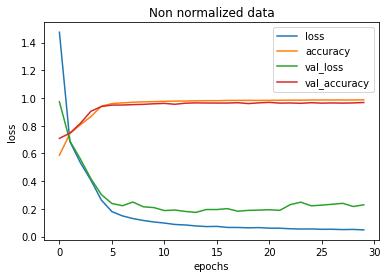

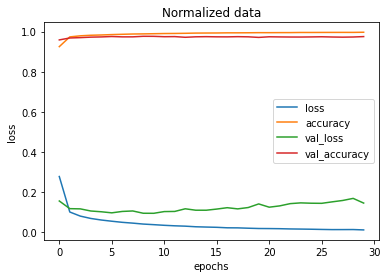

In [ ]:
# Visualize the loss vs. epochs of normalized and non-normalized data
pd.DataFrame(history_1.history).plot(title = "Non normalized data",xlabel = 'epochs',ylabel = 'loss')
pd.DataFrame(history_2.history).plot(title = "Normalized data",xlabel = 'epochs',ylabel = 'loss')

###### We can see that after 10 ecpochs there is no significant increase in accuracy and decrease in loss for both training and test set.
so lets choose number of epochs = 10 for further model.

###### Lets try improving our model by tuning:
* Number of layers of neural network
* Number of neurons in each layer
* Learning rate

In [ ]:
# Set the random seed for reproducibility
tf.random.set_seed(42)
# Create model with more number of neuron than the previous one
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units = 100,activation = 'relu'),
    tf.keras.layers.Dense(units = 50,activation = 'relu'),
    tf.keras.layers.Dense(units = 10,activation = 'softmax')
])

In [ ]:
# Compile the model
model3.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
# fit the model
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))
history_3 = model3.fit(X_train_norm,y_train,epochs = 10,validation_data = (X_test_norm,y_test),
                       callbacks = [lr_scheduler])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1509 - accuracy: 0.9593 - val_loss: 0.0968 - val_accuracy: 0.9728 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0577 - accuracy: 0.9836 - val_loss: 0.0770 - val_accuracy: 0.9782 - lr: 0.0011
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0396 - accuracy: 0.9883 - val_loss: 0.0809 - val_accuracy: 0.9792 - lr: 0.0013
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0312 - accuracy: 0.9907 - val_loss: 0.0739 - val_accuracy: 0.9803 - lr: 0.0014
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0259 - accuracy: 0.9921 - val_loss: 0.0781 - val_accuracy: 0.9796 - lr: 0.0016
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0242 - accuracy: 0.9924 - val_loss: 0.0813 - val_accuracy: 0.9808 - lr: 0.0018
Epoch 7/10
1875/1875 [==============================] - 5s

In [ ]:
# Evaluate the model
model3.evaluate(X_test_norm,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1190 - accuracy: 0.9768


[0.11903278529644012, 0.9768000245094299]

##### Increasing the number of neurons has increased the performance
on test set

Text(0, 0.5, 'Loss')

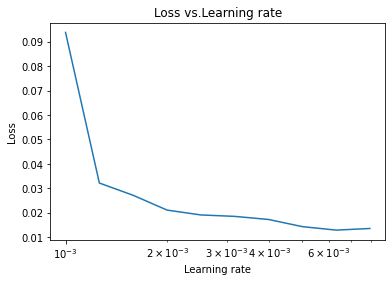

In [ ]:
# Lets plot the loss vs.learning rate
lrs = 1e-3*10**(tf.range(10)/10)
# print(pd.DataFrame(data=[history_3.history['loss'],lrs],columns=['loss','learning_rate']))
plt.semilogx(lrs,history_3.history['loss'])
plt.title("Loss vs.Learning rate")
plt.xlabel("Learning rate")
plt.ylabel("Loss")

As we can see that loss is decreasing rapidly for the learning rate between 0.001 and 0.002.
So lets further use this learning rate for training our model.

In [ ]:
# Set the random seed for reproducibility
tf.random.set_seed(42)
# Create model with more number of layers and neuron than the previous one
model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units = 100,activation = 'relu'),
    tf.keras.layers.Dense(units = 50,activation = 'relu'),
    tf.keras.layers.Dense(units = 10,activation = 'softmax')
])

In [ ]:
# Compile the model
model4.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0015),
    metrics = ['accuracy']
)

In [ ]:
# fit the model
history_4 = model4.fit(X_train_norm,y_train,epochs = 10,validation_data = (X_test_norm,y_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1357 - accuracy: 0.9622 - val_loss: 0.0986 - val_accuracy: 0.9742
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0529 - accuracy: 0.9844 - val_loss: 0.0721 - val_accuracy: 0.9796
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0344 - accuracy: 0.9891 - val_loss: 0.0787 - val_accuracy: 0.9801
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0257 - accuracy: 0.9923 - val_loss: 0.0781 - val_accuracy: 0.9810
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0208 - accuracy: 0.9929 - val_loss: 0.0829 - val_accuracy: 0.9802
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0161 - accuracy: 0.9949 - val_loss: 0.0820 - val_accuracy: 0.9828
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0167 - accuracy: 0.9947 - val_loss: 0.0966 - val_accuracy:

In [ ]:
model4.evaluate(X_test_norm,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1432 - accuracy: 0.9774


[0.14323540031909943, 0.977400004863739]

See that this learning rate has helped in further improvement on test set

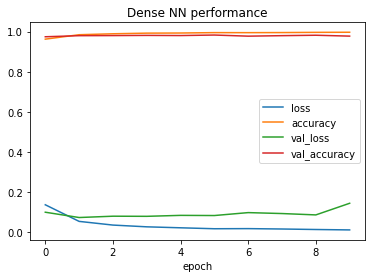

In [ ]:
# Visualize the history of the model4
pd.DataFrame(history_4.history).plot(title = "Dense NN performance",xlabel = 'epoch')

As we can see that training loss is continuously decreasing but validation loss
become constant after certain epochs but accuracy is almost constant for both training and test after 
2 to 3 epochs

##### We can see that dense neural network is stuck at approx accuracy 98%. It is very hard for further imporvement.
Lets try convolutional neural network in below cells of code.

In [ ]:
# Expand the dimension
X_train = X_train_norm.reshape([-1,28,28,1])
X_test = X_test_norm.reshape([-1,28,28,1])
X_train.shape,X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
# Building convolutional neural network
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
model = tf.keras.Sequential([
    Conv2D(28, 3, padding='same', activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(56, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(112, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(56, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(112, activation='relu'),
    Dense(224, activation='relu'),
    Dense(units = 10, activation='softmax')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 28)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 56)        14168     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 56)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 112)         56560     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 3, 3, 112)       

In [ ]:
model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.0015),
    metrics = ['accuracy']
)

In [ ]:
history_3 = model.fit(X_train,y_train,epochs = 10,validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0938 - accuracy: 0.9718 - val_loss: 0.0394 - val_accuracy: 0.9873
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0322 - accuracy: 0.9905 - val_loss: 0.0546 - val_accuracy: 0.9838
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0271 - accuracy: 0.9926 - val_loss: 0.0326 - val_accuracy: 0.9911
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0211 - accuracy: 0.9943 - val_loss: 0.0450 - val_accuracy: 0.9873
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0191 - accuracy: 0.9949 - val_loss: 0.0456 - val_accuracy: 0.9888
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0185 - accuracy: 0.9952 - val_loss: 0.0484 - val_accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0172 - accuracy: 0.9959 - val_loss: 0.0448 - val_accuracy

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0655 - accuracy: 0.9908


[0.06545163691043854, 0.9908000230789185]

🙂 See the performance on test set has increased to 99.08% and loss decreased to 0.065. Best model so far.

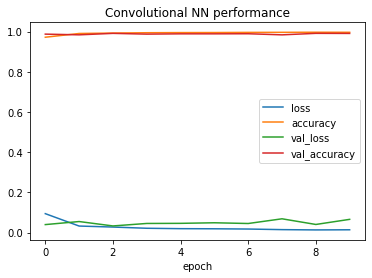

In [ ]:
# Lets visualize the history of this model
pd.DataFrame(history_3.history).plot(title = 'Convolutional NN performance',xlabel='epoch')

##### Here we can see that test accuracy and training accuracy almost same.
only validation loss is slightly greater than traininig loss

In [ ]:
# Lets make prediction on the best model having higher accuracy on test set.
y_probs = model.predict(X_test)
y_probs  # This is the probability prediction 

313/313 [==============================] - 1s 2ms/step


array([[9.9720109e-01, 2.1378390e-05, 7.2931350e-08, ..., 2.3535007e-05,
        5.3604676e-06, 4.6423070e-06],
       [3.7278298e-07, 9.9999583e-01, 9.4568664e-09, ..., 1.9379501e-14,
        1.3596002e-09, 4.3628946e-13],
       [1.6341747e-16, 1.8952964e-12, 1.0000000e+00, ..., 3.3912603e-25,
        1.9385524e-15, 2.4225068e-17],
       ...,
       [4.2745962e-16, 2.1735285e-15, 5.9204718e-29, ..., 1.0000000e+00,
        2.8129224e-18, 6.9987900e-20],
       [1.6104052e-12, 4.4388635e-15, 2.9718005e-16, ..., 1.7660240e-20,
        1.0000000e+00, 1.1589605e-12],
       [1.5811723e-18, 1.9330834e-27, 9.9941067e-20, ..., 5.4577200e-26,
        3.4848217e-15, 1.0000000e+00]], dtype=float32)

In [ ]:
# Lets see probability of each class for first test data.
y_probs[0]

array([9.9720109e-01, 2.1378390e-05, 7.2931350e-08, 6.8784090e-08,
       1.6390013e-06, 2.7414346e-03, 7.8994395e-07, 2.3535007e-05,
       5.3604676e-06, 4.6423070e-06], dtype=float32)

We can see that probability at first index is maximum which means for first test data the
the probability of being 0 is higher

In [ ]:
# Lets check what digit is at 0th index of test set.
Y_test.Digits[0]

0

See the ground truth label at 0th index is also 0. which means our model is predicting it right.

In [ ]:
# Storing index of higher probability in y_pred
y_pred = tf.argmax(y_probs,axis = 1)
y_pred

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([0, 1, 2, ..., 7, 8, 9])>

In [ ]:
# Lets check it with the actual label
rand_index = np.random.randint(0,10000)
name_classes[y_pred[rand_index]],name_classes[Y_test.Digits[rand_index]]

('Six', 'Six')

See the prediction and actual label is same.

In [ ]:
# Make confusion matrix 
from sklearn.metrics import confusion_matrix
import itertools
# create a function for confusion matrix
def make_confusion_matrix(y_test,y_pred,classes = None,figsize = (10,10)):
  cm = confusion_matrix(y_test,y_pred)
  cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]
  # Lets prettify it
  fig,ax = plt.subplots(figsize=figsize)
  # creat a matrix plot
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)
  # Set xaxis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()
  # Adjust label size
  ax.yaxis.label.set_size(10)
  ax.xaxis.label.set_size(10)
  ax.title.set_size(10)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  # Label the axes
  ax.set(title = 'Confusion Matrix',
        xlabel = 'Predicted label',
        ylabel = 'True value',
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels  = labels)
  # Set threshold for different colors
  threshold = (cm.max()+cm.min())/2
  # plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment = 'center',
            color = 'white' if cm[i,j]>threshold else 'black',
            size = 10)

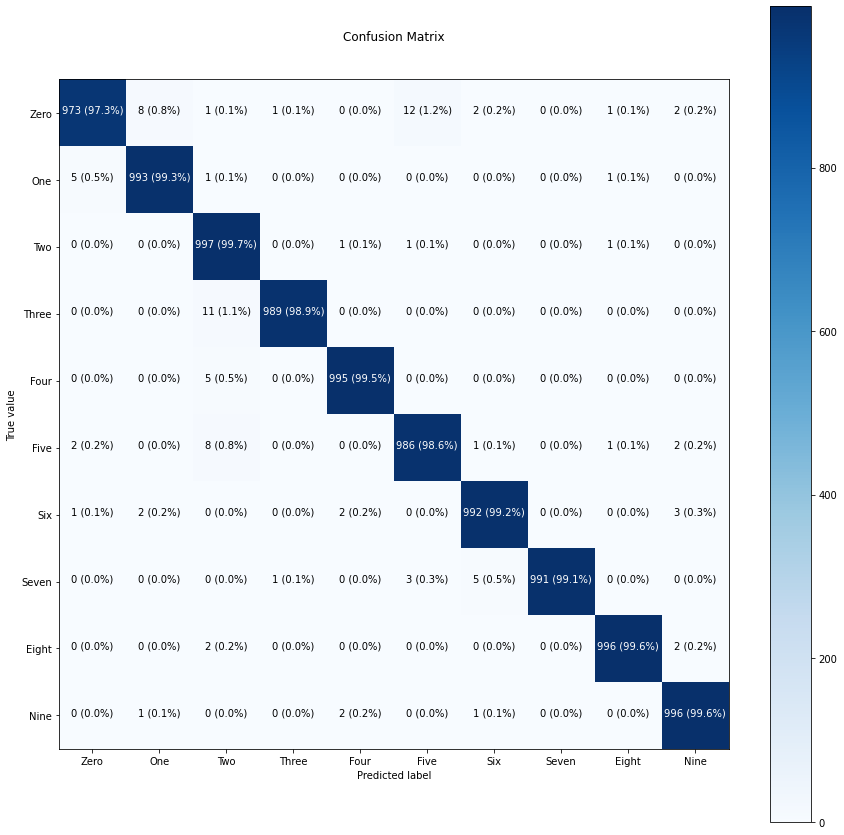

In [ ]:
# Lets visualize confusion matrix 
make_confusion_matrix(Y_test,y_pred,name_classes,figsize = (15,15))

From the confusion matrix it is clear that our model is performing almost 100% on all digits. But it is slightly confused between 0 and 5 as well as 3 and 2.

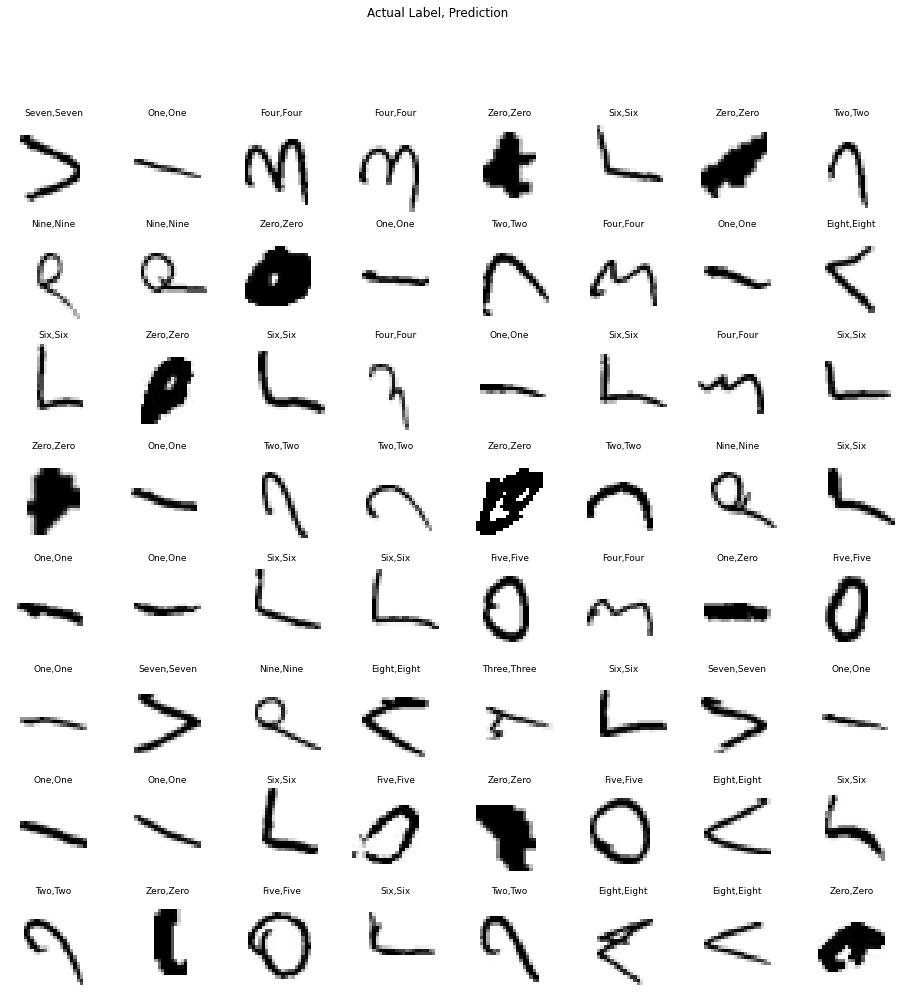

In [ ]:
# Lets see random 64 images of our test lables and predictions  (Left lable: true label and right label: predicted label)
# reshape the test set into 28 x 28 pixel
X_test = X_test.reshape(X_test.shape[0],28,28)
plt.figure(figsize = (12,12))
fontsize = 9
for i in range(64):
  rand_index = np.random.randint(0,10000)
  ax = plt.subplot(8,8,i+1)
  plt.imshow(X_test[rand_index],cmap = plt.cm.binary)
  ax.set_title(f"{name_classes[Y_test.Digits[rand_index]]},{name_classes[y_pred[rand_index]]}",fontdict={'fontsize':fontsize})
  plt.suptitle("Actual Label, Prediction")
  plt.axis(False)
     

###### Summary of experimentation to improve the model
* First model was trained on non-normalized data having small number of neurons performed upto 96.7%
* Second model was trained on normalized dataset having same architecture as the first one, perforemd upto 97.5%
* Third model was trained on normalized data set with more number of neurons which improved the performance upto 97.68%
* Fourth model was trained on normalized dataset having same architecture than the third one but with best learning rate, improved the performance upto 97.74%

Having tried various tuning with Dense NN it is observed that improvement was not remarkable. So tried Convolutional NN.
* Convolutional neural network boosted the accuracy upto 99.08% and loss decrease to 0.065.

**Conclusion:**

The model trained with convolutional NN has higher accuracy so used that model to make predictions and it was found that it predicted all digit accurately with almost 100% accuracy.

**Further improvement:**

One may try with more complex neural network and train for larger epochs and see if further accuracy is increased.